# Credit Card Fraud Detection

This notebook will create and test a model that will flag all fraudulent transactions while not flagging non-fraudulent transactions. The cost of fraud (false negative: flagging a transaction as non-fraudulent when it is fradulent) and cost of humna labor (false positive: flagging a transaction as fradulent when it is not fraudulent) are two aspects we need to keep in mind . <br><br> We will test multiple machine learning models including:<br> 1.Decision Trees <br>2.Logistic Regression<br> 3.K-nearest Neighbors, etc.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
%matplotlib inline

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, recall_score, precision_recall_curve, classification_report
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [3]:
df = pd.read_csv("/Users/chaer/OneDrive/Desktop/A List of Personal Projects/Data/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Exploratory Data Analysis

In [4]:
df.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are a total of 30 features. We do not need to worry about null values in this dataset. 

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Kernel Density Estimation Plots
Many of the features seem to have a similar distribution of fraudulent and non-fradulent transactions. On the other hand, some features seem to differ in their respective distributions. 

<Figure size 640x480 with 0 Axes>

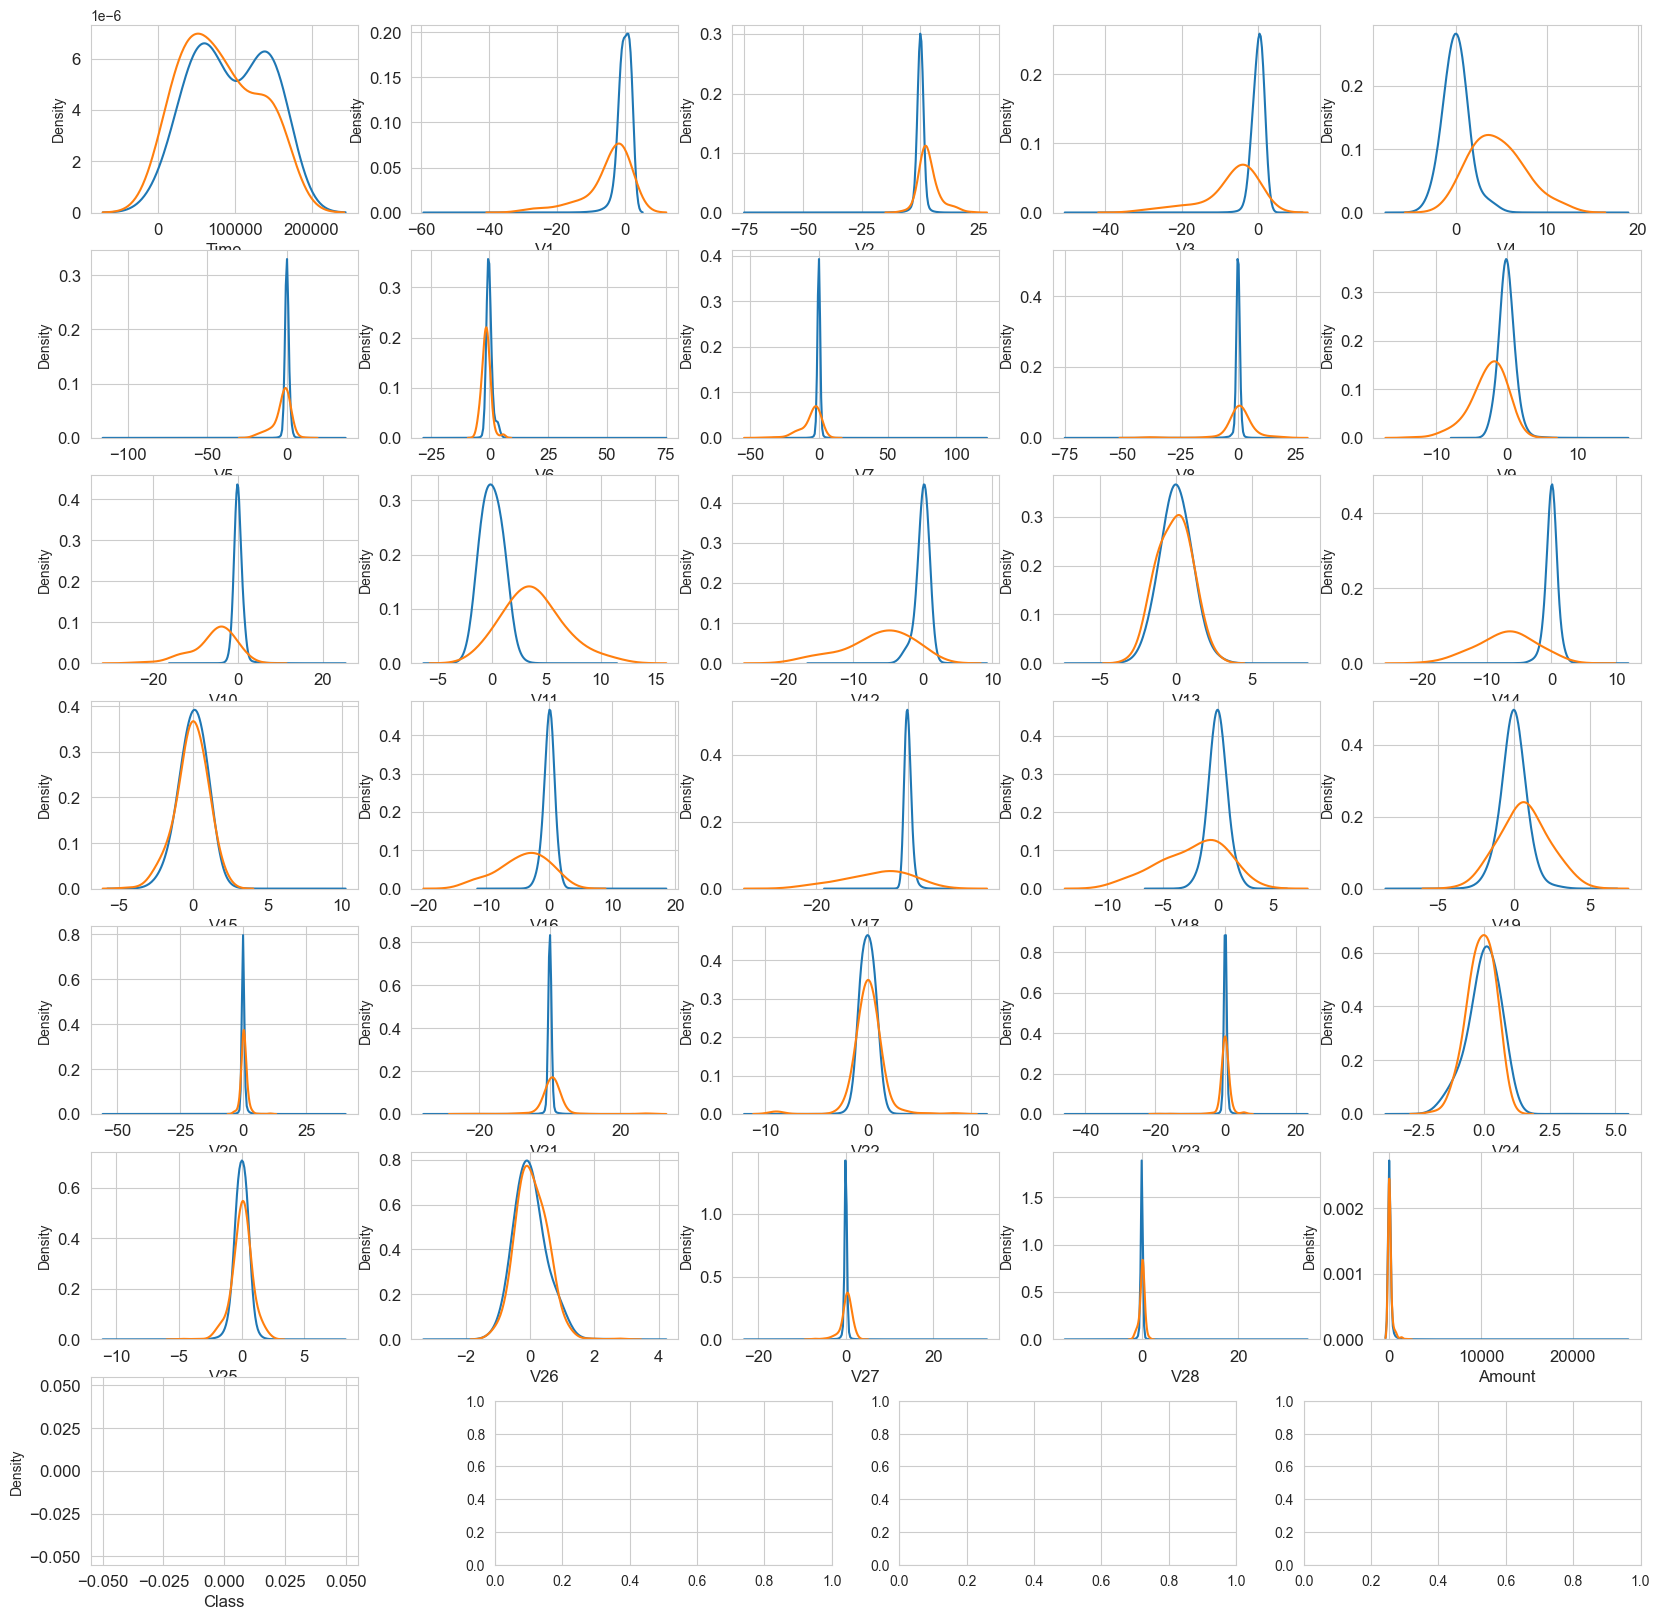

In [91]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4, figsize = (20,20))

for feature in var:
    i += 1
    plt.subplot(7,5,i)
    sns.kdeplot(t0[feature], bw = 0.5,label = "Class = 0")
    sns.kdeplot(t1[feature], bw = 0.5,label = "Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.tight_layout()
plt.show()

Most of the variables seem to have similar distributions for fraudulent and non-fraudulent transactions with the exception of a few negatively correlated variables (shown below in the correlation matrix)

#### Correlation Matrix

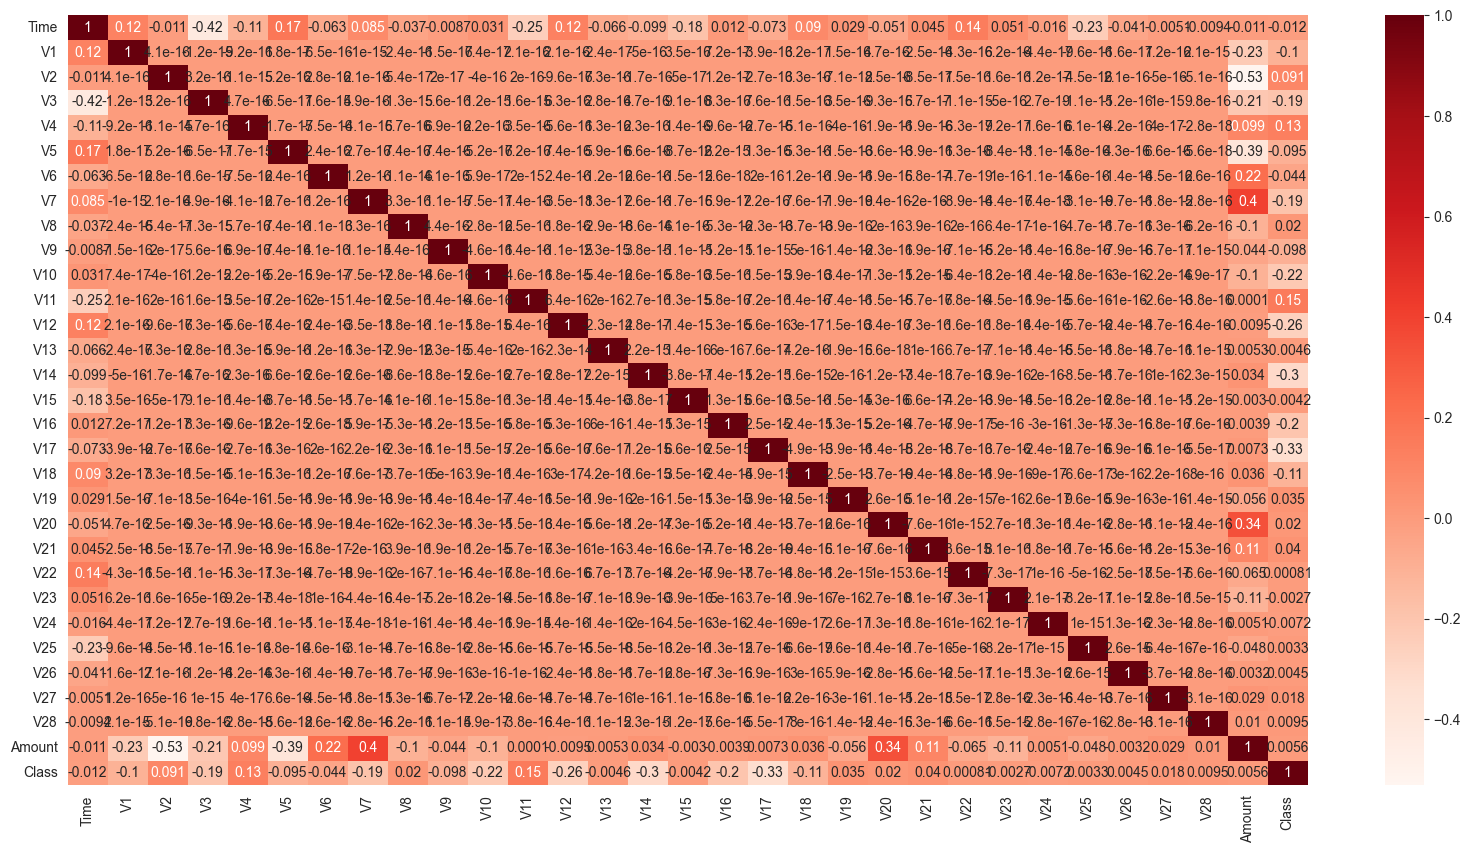

In [7]:
# correlation matrix (features V10, V12, V14 have strong negative correlations with the feature Class)
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, cmap = plt.cm.Reds)
plt.show()

Negatively correlated variables against the Class variable are shown in the bottom row of the correlation matrix some of which include V14, V12, V10, etc.

#### Data Scaling

We will transform the time feature from days to hours for a more precise look into the time of fraudelent transactions. You could also include seconds and minutes but for simplicity, I just chose hours. We will also apply a log transformation to the amount feature due to the heavy skewness of the distribution. 

In [8]:
df['Time'] = df['Time'].apply(lambda x: np.floor(x / 3600))

In [9]:
df['Amount'] = np.log10(df['Amount'] + 0.0001)

#### Class Imbalance

0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

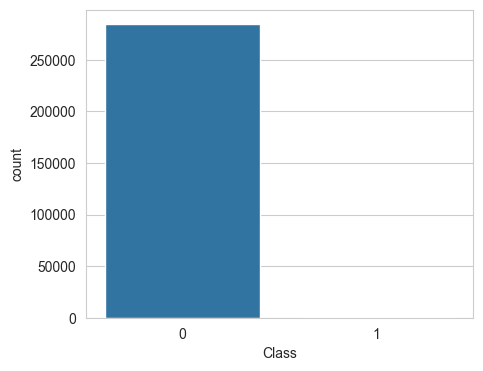

In [10]:
# huge class imbalance (most of the transactions are non-fraud)
print(df.Class.value_counts())

plt.figure(figsize = (5,4))
sns.countplot('Class', data = df)

#### Distributions of Time and Amount

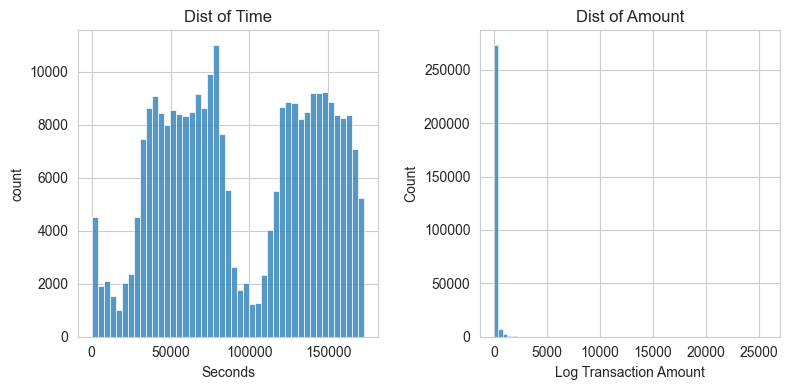

In [55]:
#define subplots
fig, ax = plt.subplots(1, 2, figsize = (8,4))
fig.tight_layout()

#create subplots
sns.histplot(data = df, x = 'Time', bins = 45, ax = ax[0])
ax[0].title.set_text('Dist of Time')
ax[0].set_xlabel('Seconds')
ax[0].set_ylabel('count')

sns.histplot(data = df, x = 'Amount', bins = 60, ax = ax[1])
ax[1].set_xlabel('Log Transaction Amount')
ax[1].title.set_text('Dist of Amount')

plt.tight_layout()
plt.show()

The feature amount distribution does not seem to have a skewed distribution. There are still some outliers. 

#### Random Undersampling

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# original testing set will be tested on by the model fitted on the undersampled data below
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size = 0.2, stratify = df['Class'])

0    492
1    492
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

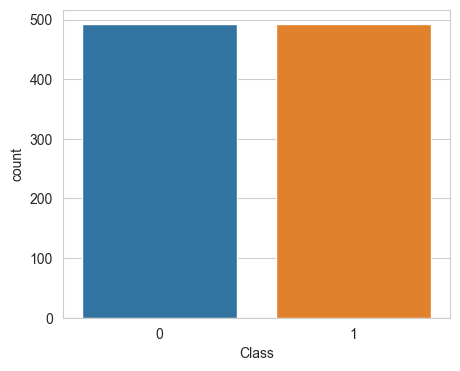

In [13]:
# random undersampling for balanced classes(1:492, 0:492)
df1 = df.sample(frac = 1)
fraud = df1[df1['Class'] == 1][:492]
non_fraud = df1[df1['Class'] == 0][:492]
df1 = pd.concat([fraud, non_fraud])
df1 = df1.sample(frac = 1)

print(df1.Class.value_counts())
plt.figure(figsize = (5,4))
sns.countplot('Class', data = df1)
# equally balanced classes

#### Outlier Detection and Removal

Outliers can be removed at this part of the process. However, since the data of each column has been censored for privacy reasons, there is not enough information to decide whether to remove outliers. Therefore, all observations were kept. 

## Classifiers (Undersampling)

We are interested in finding the best precision and recall score. The precision score would show how well the model is able to identify non-fraudulent transactions while the recall score would show how well the model is able to identify fradulent transactions. As a result, the f1 score is a good measure of how well the model will predict both non-fradulent and fradulent transactions. 

In [14]:
classifiers = {
    "LogisiticRegression": LogisticRegression(max_iter = 5000),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

In [15]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

X_train_und, X_test_und, y_train_und, y_test_und = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = df1['Class'])

In [16]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# scaling with Robust Scaler for less impact from outliers
scaler = RobustScaler()
X_train_und['Time'] = scaler.fit_transform(X_train_und['Time'].values.reshape(-1, 1))
X_test_und['Time'] = scaler.transform(X_test_und['Time'].values.reshape(-1, 1))

In [45]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold, cross_validate

# cross validating on training data over 5 folds (training score)
# Logistic Regression and Random Forest seem to do very well
print('Cross Validation Training Set F1 Scores\n-----------------------------')
for key, classifier in classifiers.items():
    training_score = cross_val_score(classifier, X_train_und, y_train_und, cv = 5, scoring = make_scorer(f1_score))
    print(classifier.__class__.__name__, ":", round(training_score.mean() * 100, 2).astype(str) + '%')

Cross Validation Training Set F1 Scores
-----------------------------
LogisticRegression : 93.62%
KNeighborsClassifier : 93.07%
SVC : 92.79%
RandomForestClassifier : 94.51%
XGBClassifier : 94.57%


In [18]:
# the model fitted on the undersampled data has great training scores
print('Training set scores F1 Scores\n---------------------------')
for x, model in classifiers.items():
    model.fit(X_train_und, y_train_und)
    y_pred_und = model.predict(X_train_und)
    print(x, ":", round(f1_score(y_train_und, y_pred_und) * 100, 2).astype(str) + '%')

Training set scores F1 Scores
---------------------------
LogisiticRegression : 95.3%
KNearest : 94.76%
Support Vector Classifier : 93.76%
RandomForestClassifier : 100.0%
XGBoost : 100.0%


In [19]:
# the model fitted on the undersampled data has great testing scores as well
print('Testing set scores F1 Scores\n---------------------------')
for x, model in classifiers.items():
    model.fit(X_train_und, y_train_und)
    y_pred_und = model.predict(X_test_und)
    print(x, ":", round(f1_score(y_test_und, y_pred_und) * 100, 2).astype(str) + '%')

Testing set scores F1 Scores
---------------------------
LogisiticRegression : 92.97%
KNearest : 91.49%
Support Vector Classifier : 91.4%
RandomForestClassifier : 92.47%
XGBoost : 92.55%


In [20]:
# however, when tested on the original dataset with thousands of unseen observations, 
# this model does a poor job in detecting non-fraud transactions
xgb = XGBClassifier()
xgb.fit(X_train_und, y_train_und)
original_ypred = xgb.predict(original_Xtest)
print(classification_report(original_ytest, original_ypred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.05      1.00      0.09        98

    accuracy                           0.96     56962
   macro avg       0.52      0.98      0.53     56962
weighted avg       1.00      0.96      0.98     56962



The model had great scores when tested on the training and testing set of the undersampled dataset. However, when tested on the original testing set, the model performed very poorly in identifying non-fraudulent cases. The model did a very good job in identifying the fraudulent cases but the precision score was 0.04 which meant that most non-fradulent cases were identified as fraudulent. This could cause a lot of confusion for many customers as well as more time and money from the company to review each misidentified transaction.

## Oversampled Data (SMOTE)

The Synthetic Minority Over-sampling Technique will be used to oversample the minority class of the training set and not the whole data to avoid data leakage into the test set. The test set will be tested with the transformed training set. 

In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#### Feature Selection

In [22]:
# feature selection through backward elimination
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features) > 0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

# all features are considered important so all are kept
backward_elimination(X, y)

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V24',
 'V26',
 'V27',
 'V28',
 'Amount']

All the features seem to have a significant effect on the dependent variable Class. 

#### Splitting the dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, stratify = df['Class'])

#### Oversampling the training set

In [24]:
X_train_res, y_train_res = SMOTE().fit_resample(X_train, y_train)

#### Scaling the Time Feature

In [25]:
scaler = StandardScaler()

X_train_res['Time'] = scaler.fit_transform(X_train_res['Time'].values.reshape(-1, 1))
X_test['Time'] = scaler.transform(X_test['Time'].values.reshape(-1, 1))

### Training and Testing Two Classifiers

In [26]:
model_name = []
precision = []
recall = []
f1score = []

def get_scores(model):
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    
    model_name.append(type(model).__name__)
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1score.append(f1_score(y_test, y_pred))

#### XGBoost Classifier

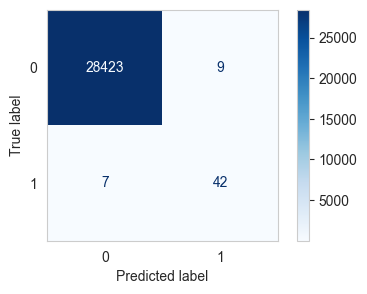

In [27]:
# xgb classification on the oversampled data
xgb = XGBClassifier()
get_scores(xgb)

fig, ax = plt.subplots(figsize = (5,3))
plt.grid(False)
plot_confusion_matrix(xgb, X_test, y_test, cmap = plt.cm.Blues, ax = ax)

#### Random Forest Classifier

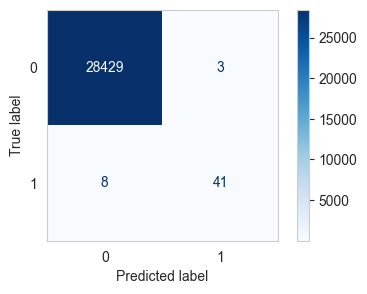

In [28]:
# random forest classification on the oversampled data
rf = RandomForestClassifier()
get_scores(rf)

fig, ax = plt.subplots(figsize = (5,3))
plt.grid(False)
plot_confusion_matrix(rf, X_test, y_test, cmap = plt.cm.Blues, ax = ax)

#### Logistic Regression

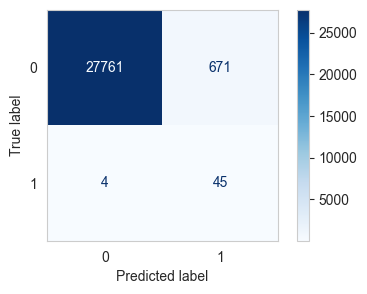

In [29]:
lr = LogisticRegression()
get_scores(lr)

fig, ax = plt.subplots(figsize = (5,3))
plt.grid(False)
plot_confusion_matrix(lr, X_test, y_test, cmap = plt.cm.Blues, ax = ax)

#### K-Nearest Neighbors

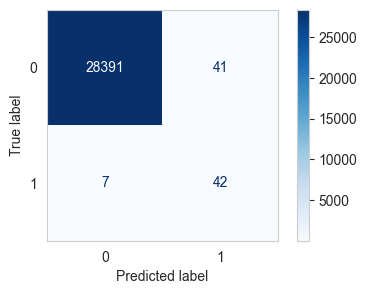

In [30]:
knn = KNeighborsClassifier()
get_scores(knn)

fig, ax = plt.subplots(figsize = (5,3))
plt.grid(False)
plot_confusion_matrix(knn, X_test, y_test, cmap = plt.cm.Blues, ax = ax)

In [31]:
percentile_list = pd.DataFrame(
    {'model name': model_name,
     'precision score': precision,
     'recall score': recall,
     'f1 score': f1score
    }).set_index('model name')
percentile_list

,precision score,recall score,f1 score
model name,,,
XGBClassifier,0.823529,0.857143,0.840000
RandomForestClassifier,0.931818,0.836735,0.881720
LogisticRegression,0.062849,0.918367,0.117647
KNeighborsClassifier,0.506024,0.857143,0.636364


### Optimizing Threshold for Precision-Recall 

Instead of predict function, we can use predict_proba function to determine the probabilities for each class. The idea is that by assigning different thresholds to class 1, we can control precision and recall.

#### XGB Classifier

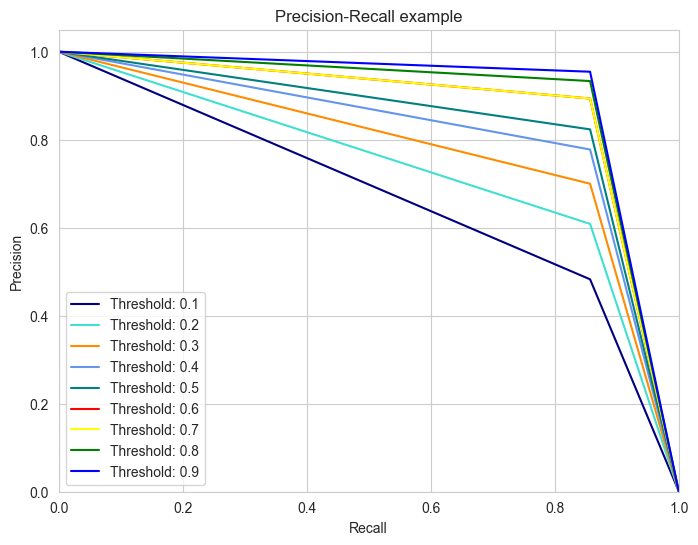

In [32]:
from itertools import cycle

y_pred_xgb_proba = xgb.predict_proba(X_test)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(8,6))

j = 1
for i,color in zip(thresholds,colors):
    y_pred_xgb_test = y_pred_xgb_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb_test)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color = color,
                 label = 'Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc = "lower left")

#### Best Threshold for XGB Classifier

In [49]:
y_pred_xgb_final = y_pred_xgb_proba[:,1] > 0.9
print(classification_report(y_test, y_pred_xgb_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.95      0.86      0.90        49

    accuracy                           1.00     28481
   macro avg       0.98      0.93      0.95     28481
weighted avg       1.00      1.00      1.00     28481



#### Random Forest Classifier

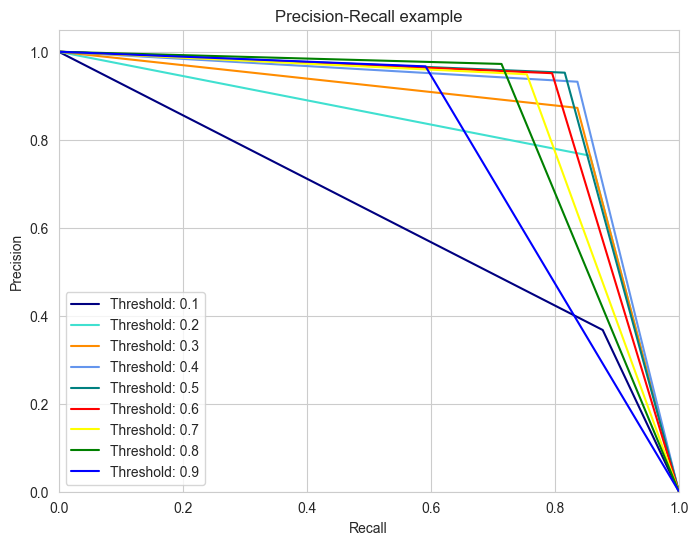

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
y_pred_rf_proba = rf.predict_proba(X_test)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(8,6))

j = 1
for i,color in zip(thresholds,colors):
    y_pred_rf_test = y_pred_rf_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf_test)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color = color,
                 label = 'Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc = "lower left")

#### Best Threshold for Random Forest Classifier

In [46]:
y_pred_rf_final = y_pred_rf_proba[:,1] > 0.4
print(classification_report(y_test, y_pred_rf_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.93      0.84      0.88        49

    accuracy                           1.00     28481
   macro avg       0.97      0.92      0.94     28481
weighted avg       1.00      1.00      1.00     28481



### Precision-Recall Threshold Results
By changing the thresholds, we were able to achieve higher f1 scores by adjusting the precision and recall scores. The best classifiers we found were XGB Classifier and Random Forest Classifier.<br><br> XGB Classifier F1 Scores <br> Normal: 88% <br> Optimized Threshold: 90% <br><br> Random Forest Classifier F1 Scores<br> Normal: 88% <br> Optimized Threshold: 89%


## Applying Model to Business Case

An ideal model would capture all the fraudulent cases while not flagging any clean transactions. This would hypothetically minimize the cost and time expended by the company to deal with fraduluent transactions. <br> <br> 
1. Cost of Fraud <br> 
- A false negative (deemed not fraudulent but it was fraudulent) <br> 
- The cost of insurance and/or reimbursement by the company to fraud victims <br><br>
2. Cost of Human Labor <br> 
- A false positive (deemed fraudulent but was not fraudulent) <br> 
- The cost of expending workers to investigate flagged transactions. <br><br>

#### Assumptions about the dataset<br>
1. Since the dataset only consists of two days worth of transactions, we will have to assume that this is representative of the normal business workflow. <br>
2. Taking number one into account, we will also have to assume that the average fraudulent transaction amounts are not some outliers, but is within a reasonable margin of the average fraudulent transaction amounts on a larger time scale as well. 
3. For the sake of the business case, we will be focusing on an average financial hub in the UK where the wages will be the average wage of employees in this sector. <br><br>

#### Social Cost of Fraud (Customer Dissatisfaction): <br> 

False Positive: <br>
https://www.digitalcommerce360.com/2020/07/16/33-of-us-consumers-drop-retailers-after-a-false-decline-heres-how-to-prevent-those-losses/ <br>
- 33% of customers would not come back to the retailer if they were declined as a result of potential fraud <br>
- There is also the loss of potential revenue and customers:    
> - merchant may lose thousands of potential revenue if they lose one customer <br> 
> - a bad review may circulate through the internet and social circles which may cost merchants tens of thousands in potential customers and revenue as well <br> 

False Negative: <br>
https://www.corporatecomplianceinsights.com/customer-experience-emotional-toll-fraud/ <br> 
- Study shows that 3 out of 10 customers will leave/change their financial institution after dealing with fraud
- There is also the cost of losing customers who have been victims of fraud 

It is important to note that these statistics were taken in the US. It is very difficult to quantity the cost of fraud in the UK. For the sake of simplicity, we will not include customer dissatisfaction into the cost of fraud as it is dependent on each customer. Therefore, the cost of a false positive and false negative will effectively cancel each other out. <br><br>

#### Cost of Misclassifying a Fraud Transaction (False Negative)<br> 

For this case, we will assume that the company will reimburse the victim of fraud the full amount of the fraudulent transaction.

In [36]:
df = pd.read_csv("/Users/chaer/OneDrive/Desktop/A List of Personal Projects/Data/creditcard.csv")

false_negative = round(df[df['Class'] == 1].Amount.mean(), 2)
print('The average cost per fraudulent case is £', false_negative)

The average cost per fraudulent case is £ 122.21


#### Cost of Misclassifying a Clean Transaction (False Positive)
This includes:
- the time and money spent to investigate the flagged transaction
- the money lost through the cancelled transaction <br> <br>

https://risk.lexisnexis.com/insights-resources/research/us-ca-true-cost-of-fraud-study<br>
- Every \$1 of fraud costs merchants \$3.75. (£ 3.20) <br>

In [37]:
#this will be calculated as the median of all fraudulent transactions multiplied by the monetary cost of fraud
cost_of_fraud = 3.20

false_positive = (df[df['Class'] == 1].Amount.median()) * cost_of_fraud
print('The cost of a false positive classification is £', false_positive)

The cost of a false positive classification is £ 29.6


#### Cost of Fraud if Left Alone

In [38]:
print('The cost of fraud if left alone per day is £', round(df[df['Class'] == 1].Amount.sum() / 2, 2))

The cost of fraud if left alone per day is £ 30063.98


#### Cost Function

In [75]:
def total_cost(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    false_negative_cost = cm[1][0] * false_negative
    false_positive_cost = cm[0][1] * false_positive
    return false_positive_cost + false_negative_cost

#### Cost Function on Undersampled Dataset

In [40]:
left_alone_cost = total_cost(original_ytest, original_ypred)
print('The cost of misclassification is £', left_alone_cost)

The cost of misclassification is £ 61272.0


As expected, the model fitted on the undersampled data did not do a good job. 

#### Cost Function on XGB Classifier (Precision-Recall Threshold )

In [64]:
thresholds, ind = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], range(0, 9, 1)

xgb_lowest_cost, xgb_cost = 0 ,[]
for i, j in zip(thresholds, ind):
    y_pred_xgb_test = y_pred_xgb_proba[:,1] > i
    xgb_cost.append(round(total_cost(y_test, y_pred_xgb_test), 2))
    print('The cost of misclassification at threshold', i, 'is £', xgb_cost[j])

xgb_lowest_cost = np.min(xgb_cost)
print('The lowest cost is', xgb_lowest_cost, 'at threshold', thresholds[xgb_cost.index(np.min(xgb_lowest_cost))])

The cost of misclassification at threshold 0.1 is £ 2187.47
The cost of misclassification at threshold 0.2 is £ 1654.67
The cost of misclassification at threshold 0.3 is £ 1388.27
The cost of misclassification at threshold 0.4 is £ 1210.67
The cost of misclassification at threshold 0.5 is £ 1121.87
The cost of misclassification at threshold 0.6 is £ 1003.47
The cost of misclassification at threshold 0.7 is £ 1003.47
The cost of misclassification at threshold 0.8 is £ 944.27
The cost of misclassification at threshold 0.9 is £ 914.67
The lowest cost is 914.67 at threshold 0.9


#### Cost Function on Random Forest Classifier (Precision-Recall Threshold)

In [65]:
thresholds, ind = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], range(0, 9, 1)

rf_lowest_cost, rf_cost = 0, []
for i, j in zip(thresholds, ind):
    y_pred_rf_test = y_pred_rf_proba[:,1] > i
    rf_cost.append(round(total_cost(y_test, y_pred_rf_test), 2))
    print('The cost of misclassification at threshold', i, 'is £', rf_cost[j])

rf_lowest_cost = np.min(rf_cost)
print('The lowest cost is', rf_lowest_cost, 'at threshold:', thresholds[rf_cost.index(np.min(rf_lowest_cost))])

The cost of misclassification at threshold 0.1 is £ 2923.66
The cost of misclassification at threshold 0.2 is £ 1240.27
The cost of misclassification at threshold 0.3 is £ 1155.28
The cost of misclassification at threshold 0.4 is £ 1066.48
The cost of misclassification at threshold 0.5 is £ 1159.09
The cost of misclassification at threshold 0.6 is £ 1281.3
The cost of misclassification at threshold 0.7 is £ 1525.72
The cost of misclassification at threshold 0.8 is £ 1740.54
The cost of misclassification at threshold 0.9 is £ 2473.8
The lowest cost is 1066.48 at threshold: 0.4


Other Classification Models

In [84]:
# logistic Regression
lr = LogisticRegression(max_iter = 5000).fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)
lr_cost = total_cost(y_test, y_pred_lr)

# K nearest neighbors
knn = KNeighborsClassifier().fit(X_train_res, y_train_res)
y_pred_knn = knn.predict(X_test)
knn_cost = total_cost(y_test, y_pred_knn)

# Xgb Classifier
xgb = XGBClassifier().fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)
xgb_cost = total_cost(y_test, y_pred_xgb)

# Random Forest Classifier
rf = RandomForestClassifier().fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
rf_cost = total_cost(y_test, y_pred_rf)

#### Cost Comparison Between Models

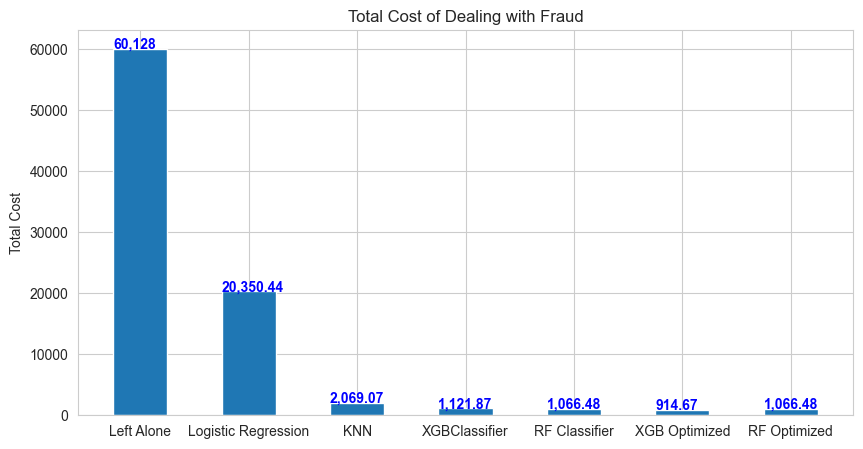

In [86]:
costs = {'Left Alone': round(df[df['Class'] == 1].Amount.sum()), 
         'Logistic Regression': lr_cost, 
         'KNN': knn_cost, 
         'XGBClassifier': xgb_cost,
         'RF Classifier': rf_cost,
         'XGB Optimized': xgb_lowest_cost, 
         'RF Optimized': rf_lowest_cost}

model = list(costs.keys())
results = list(costs.values())

fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(model, results, width = 0.5)
plt.ylabel('Total Cost')
plt.title('Total Cost of Dealing with Fraud')

xlocs = [i for i in range(0,10)]
for i, v in enumerate(results):
    ax.text(xlocs[i] - 0.25, v + 0.01, str("{:,}".format(round(v, 2))), color = 'blue', fontweight = 'bold')

plt.show()

Both optimized XGB Classifier and Random Forest Classifier did a good job in minimizing the total cost for the financial hub.

# End